In [2]:
library(data.table)

In [3]:
data_in <- fread("../15a2-OUT_DNAm_vs_cor_intermediate.csv")

In [4]:
head(data_in)

Chr,pos,population,region,mean_DNAm,var_DNAm,cor,mse
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
19,53819063,EA,dlpfc,-2.442661e-13,0.001665486,-0.27114328,0.001814755
19,53819067,EA,dlpfc,-2.436384e-13,0.001676575,-0.21985437,0.001697885
19,53819109,EA,dlpfc,-2.409120e-13,0.001786713,0.19607838,0.001779831
19,53819274,EA,dlpfc,-2.332771e-13,0.002078951,-0.09710479,0.002127343
19,53819305,EA,dlpfc,-2.315221e-13,0.002113884,0.12503751,0.002387285
19,53819313,EA,dlpfc,-2.328052e-13,0.002122310,0.06209328,0.002173770


In [5]:
library(ggplot2)

In [6]:
nrow(data_in)

[1] 219969513

In [9]:
n <- as.integer(nrow(data_in)/1000)

In [10]:
n

[1] 219969

In [12]:
data_in_subset <- data_in[sample(1:nrow(data_in), n)]

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5709 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5709 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


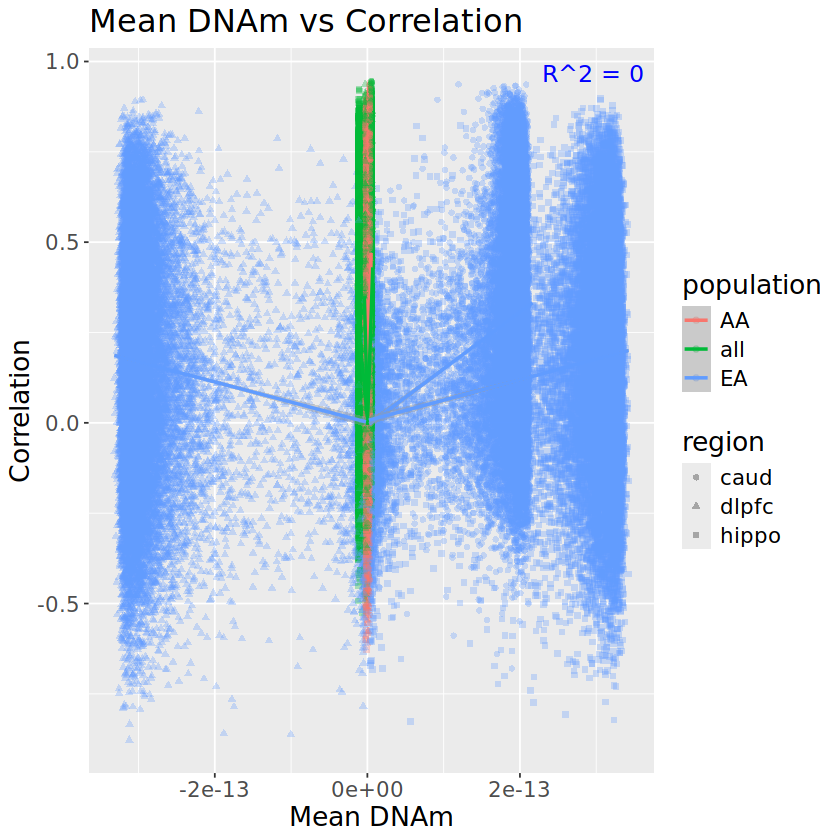

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5709 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5709 rows containing missing values or values outside the scale range
(`geom_point()`).”


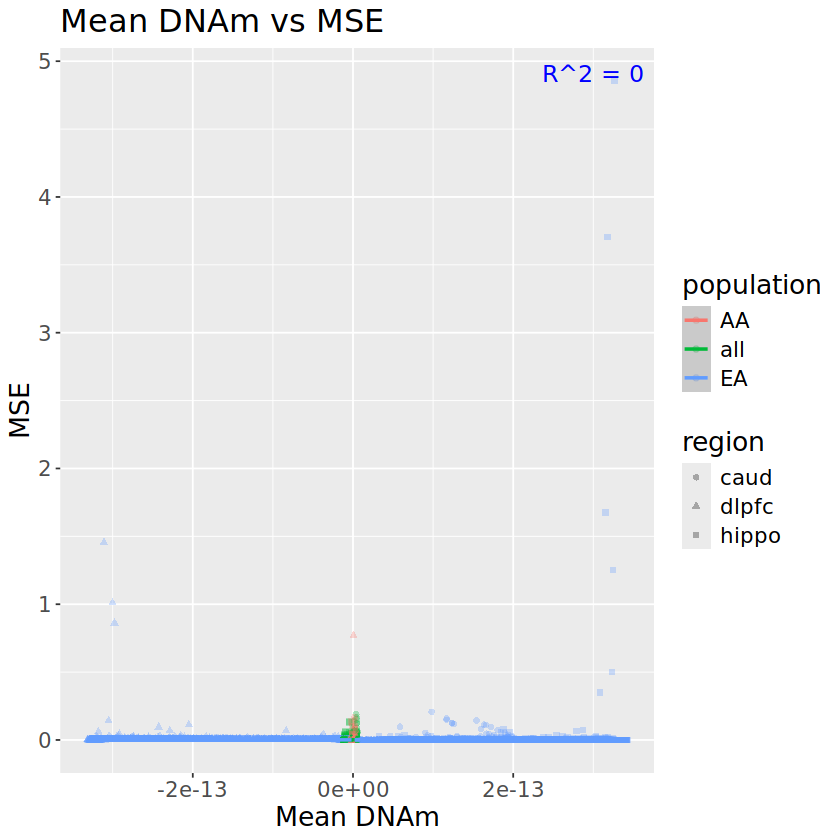

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


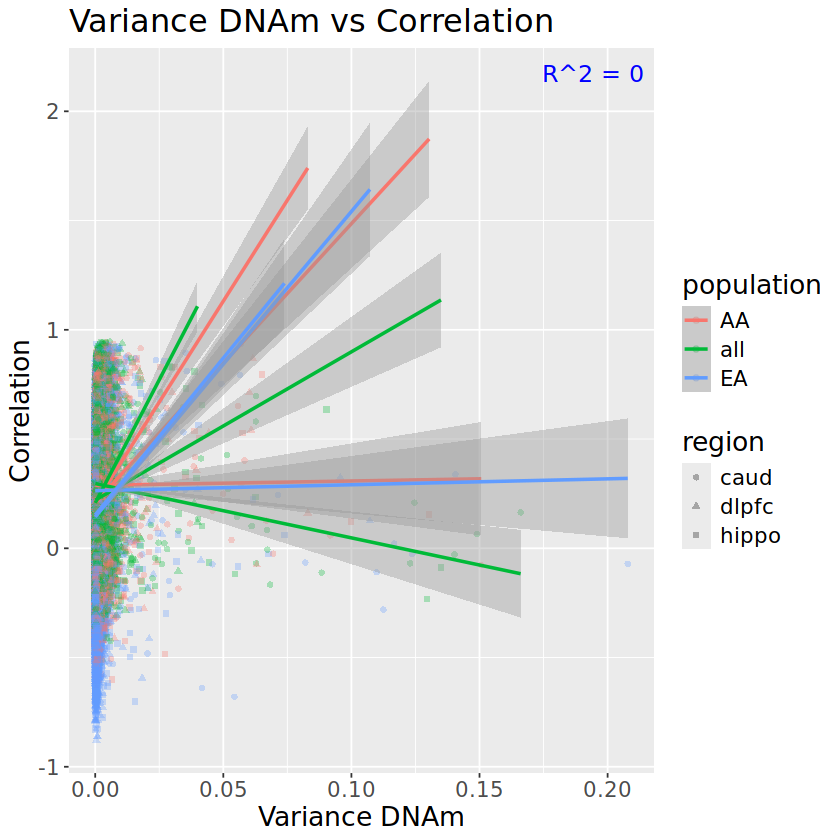

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5709 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5709 rows containing missing values or values outside the scale range
(`geom_point()`).”


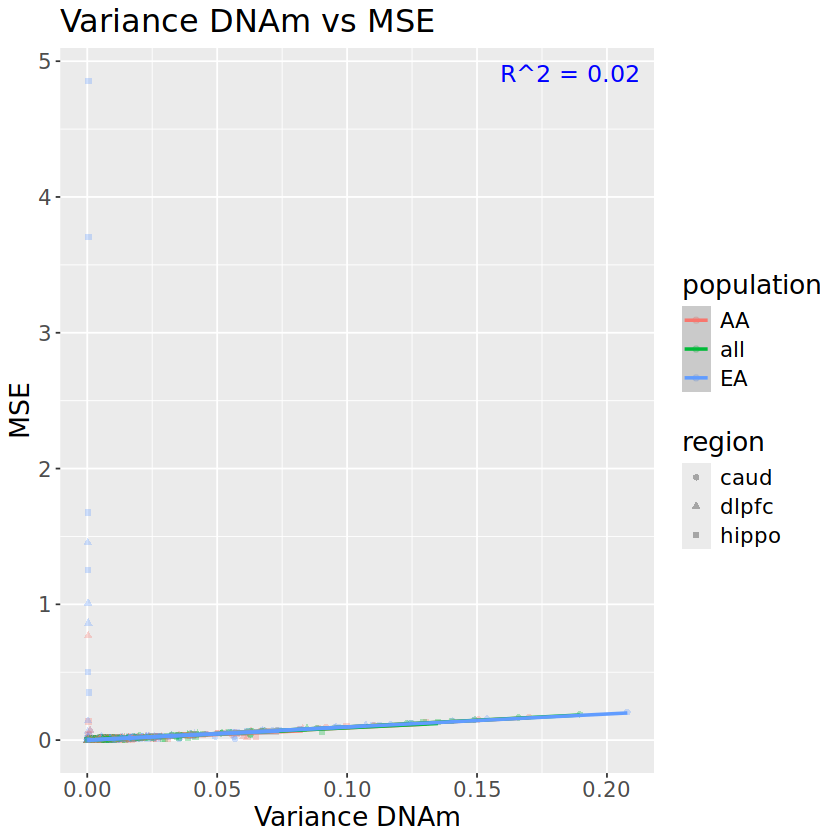

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


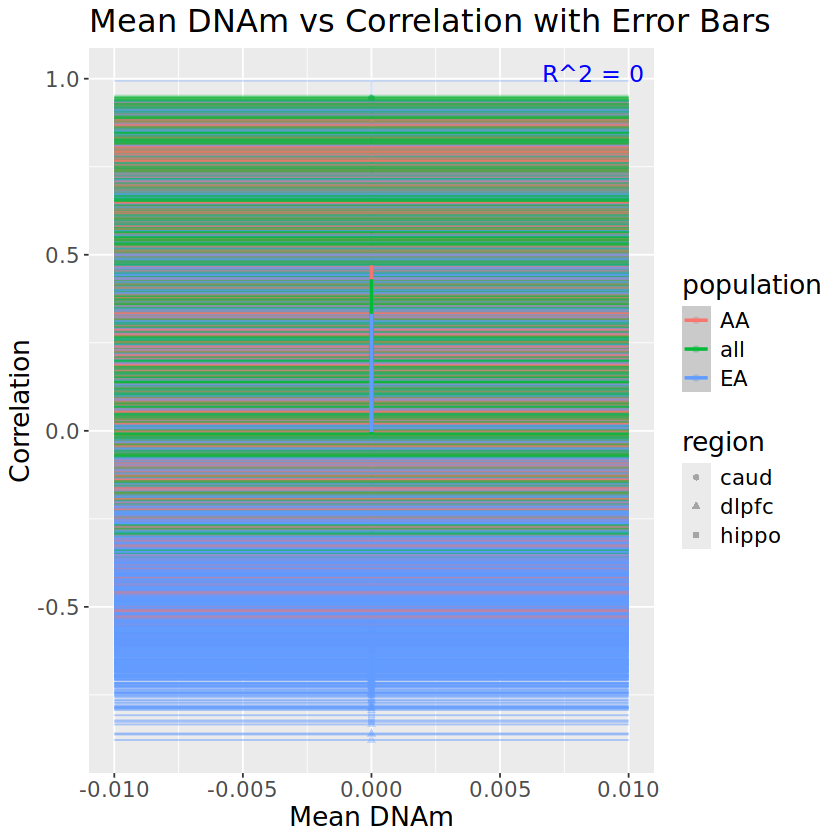

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 15 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


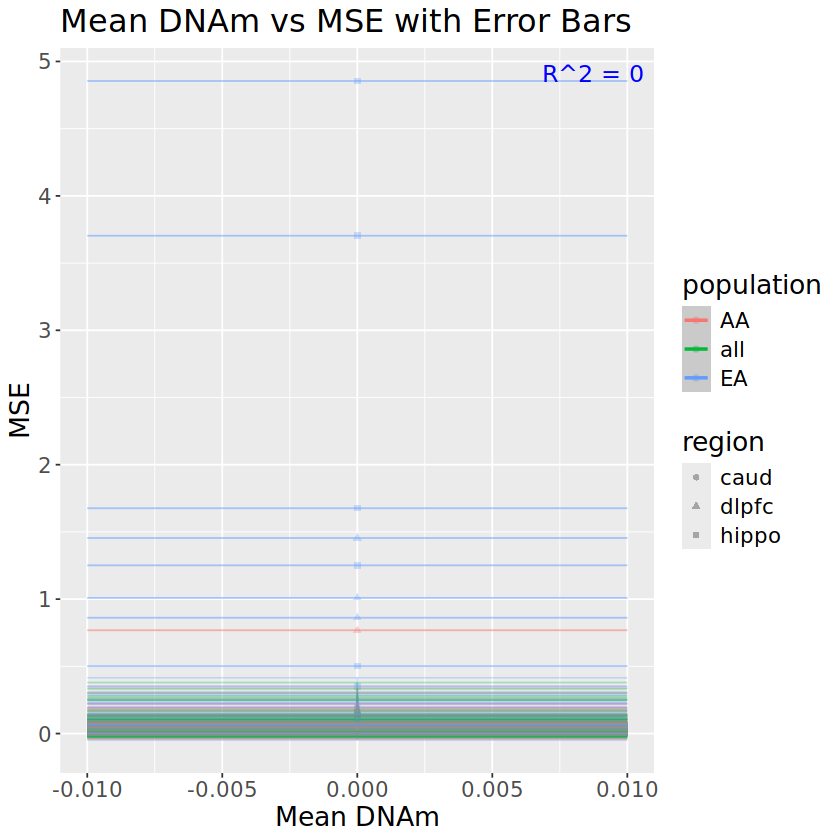

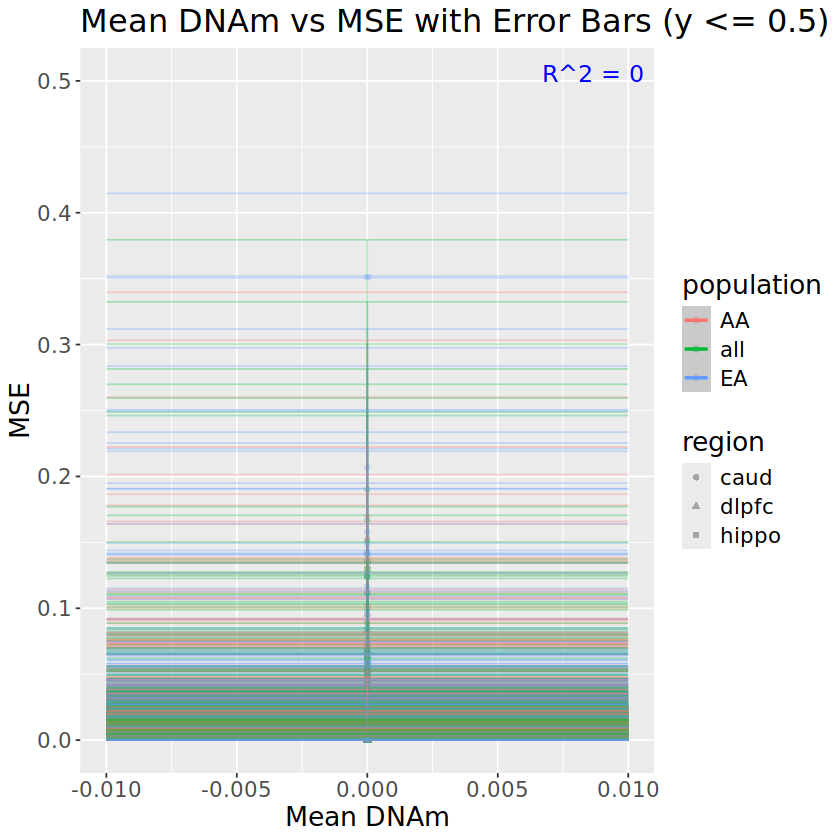

In [22]:
library(ggplot2)

# Function to add R^2 to the plot
add_r_squared <- function(plot, data, x, y) {
  lm_model <- lm(reformulate(x, y), data = data)
  r_squared <- summary(lm_model)$r.squared
  plot + annotate("text", x = Inf, y = Inf, label = paste("R^2 =", round(r_squared, 2)), 
                  hjust = 1.1, vjust = 2, size = 5, color = "blue")
}

# Plot mean_DNAm vs cor
p1 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = cor, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs Correlation", x = "Mean DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p1 <- add_r_squared(p1, data_in_subset, "mean_DNAm", "cor")
print(p1)

# Plot mean_DNAm vs mse
p2 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs MSE", x = "Mean DNAm", y = "MSE") +
  theme(text = element_text(size = 16))

p2 <- add_r_squared(p2, data_in_subset, "mean_DNAm", "mse")
print(p2)

# Plot var_DNAm vs cor
p3 <- ggplot(data_in_subset, aes(x = var_DNAm, y = cor, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Variance DNAm vs Correlation", x = "Variance DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p3 <- add_r_squared(p3, data_in_subset, "var_DNAm", "cor")
print(p3)

# Plot var_DNAm vs mse
p4 <- ggplot(data_in_subset, aes(x = var_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Variance DNAm vs MSE", x = "Variance DNAm", y = "MSE") +
  theme(text = element_text(size = 16))

p4 <- add_r_squared(p4, data_in_subset, "var_DNAm", "mse")
print(p4)

# Plot mean_DNAm vs cor with error bars based on var_DNAm
p5 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = cor, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_errorbar(aes(ymin = cor - var_DNAm, ymax = cor + var_DNAm), width = 0.02, alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs Correlation with Error Bars", x = "Mean DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p5 <- add_r_squared(p5, data_in_subset, "mean_DNAm", "cor")
print(p5)

# Plot mean_DNAm vs mse with error bars based on var_DNAm
p6 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_errorbar(aes(ymin = mse - var_DNAm, ymax = mse + var_DNAm), width = 0.02, alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs MSE with Error Bars", x = "Mean DNAm", y = "MSE") +
  theme(text = element_text(size = 16))

p6 <- add_r_squared(p6, data_in_subset, "mean_DNAm", "mse")
print(p6)

# Plot mean_DNAm vs mse with error bars based on var_DNAm and y-axis truncated at 0.5
p6_trunc <- ggplot(data_in_subset, aes(x = mean_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_errorbar(aes(ymin = mse - var_DNAm, ymax = mse + var_DNAm), width = 0.02, alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs MSE with Error Bars (y <= 0.5)", x = "Mean DNAm", y = "MSE") +
  theme(text = element_text(size = 16)) +
  ylim(0, 0.5)

p6_trunc <- add_r_squared(p6_trunc, data_in_subset[data_in_subset$mse <= 0.5, ], "mean_DNAm", "mse")
print(p6_trunc)


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5709 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5709 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


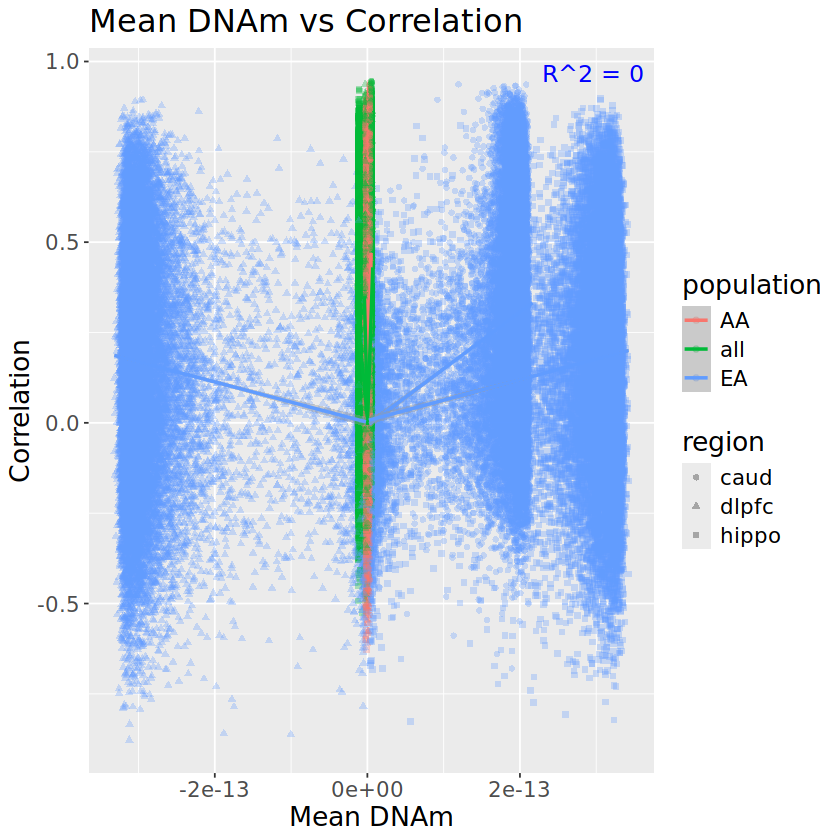

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5709 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5709 rows containing missing values or values outside the scale range
(`geom_point()`).”


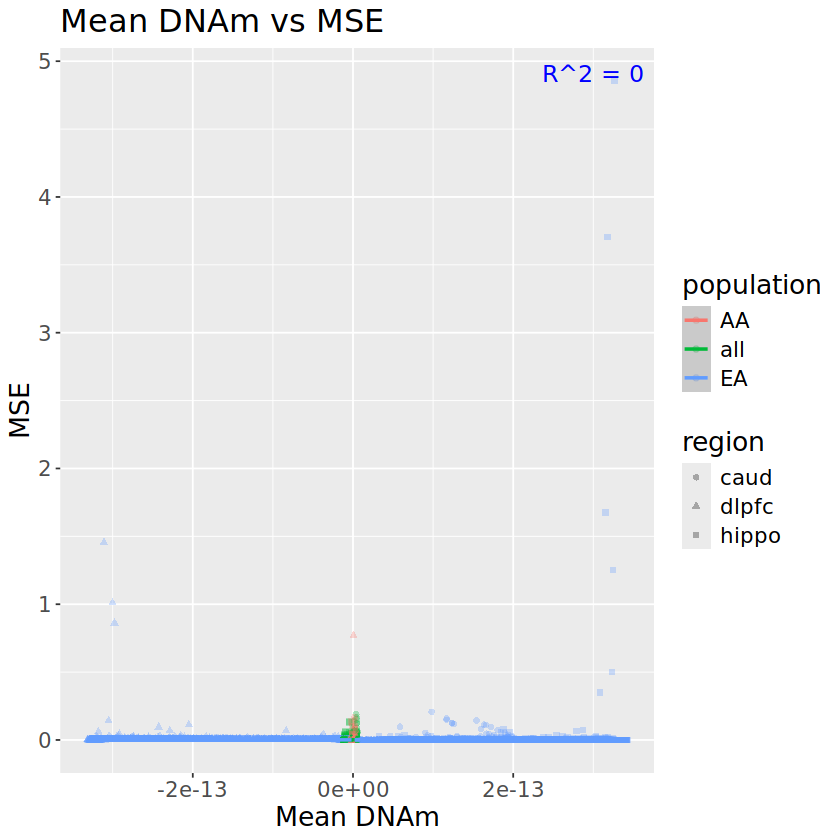

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


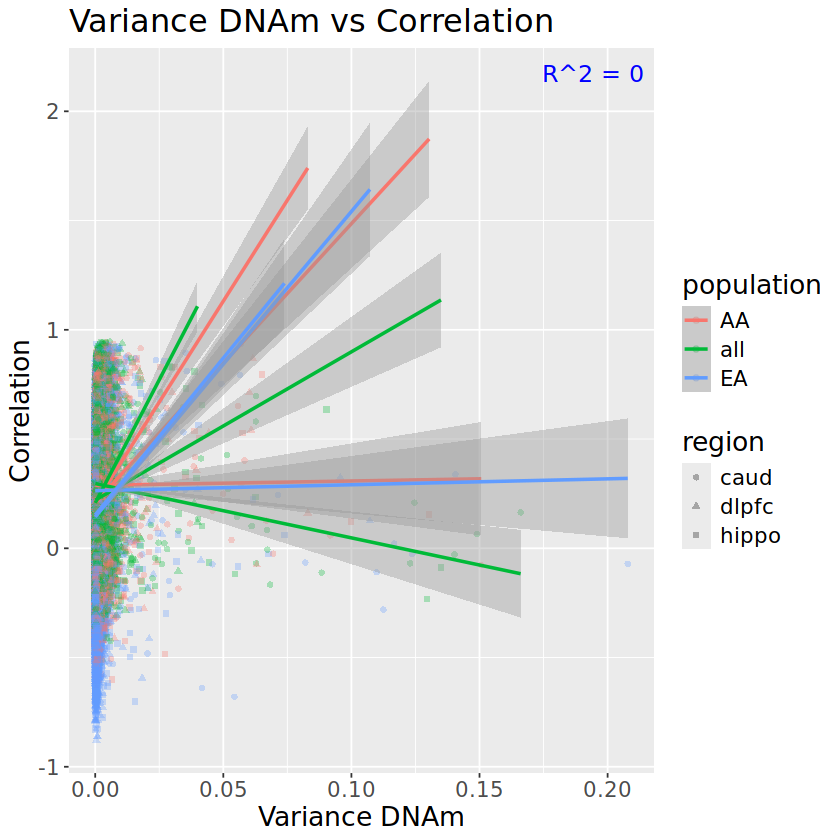

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5709 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 5709 rows containing missing values or values outside the scale range
(`geom_point()`).”


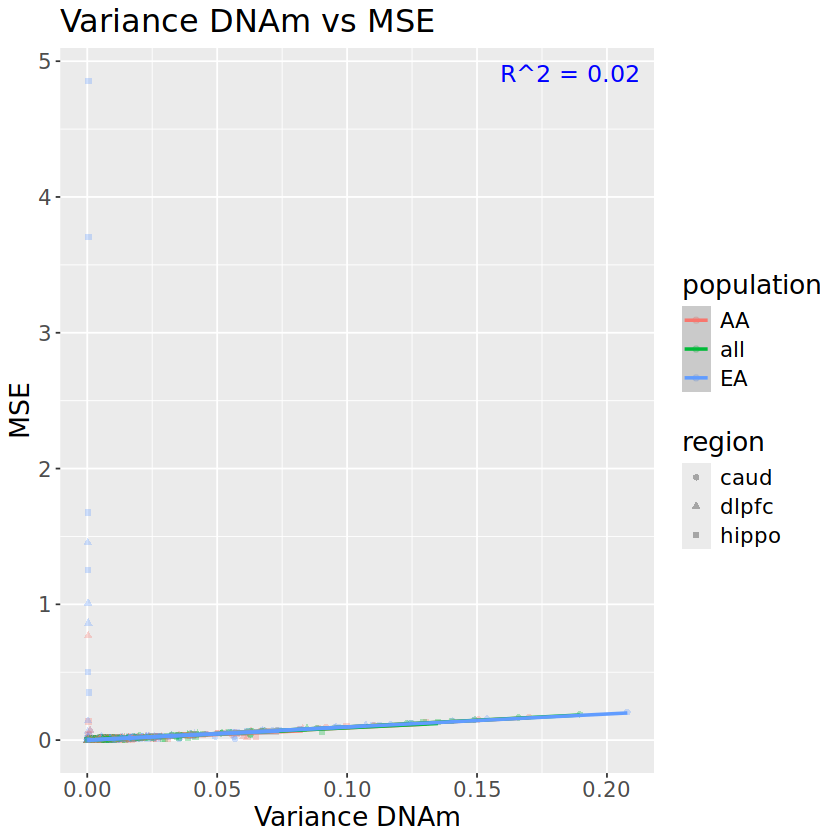

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


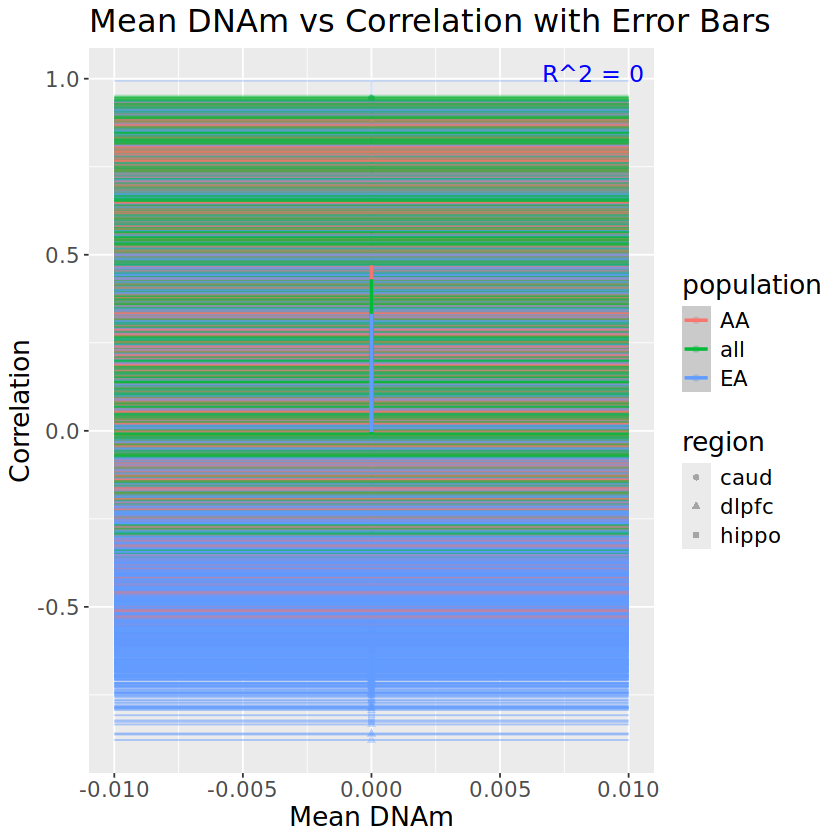

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 15 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


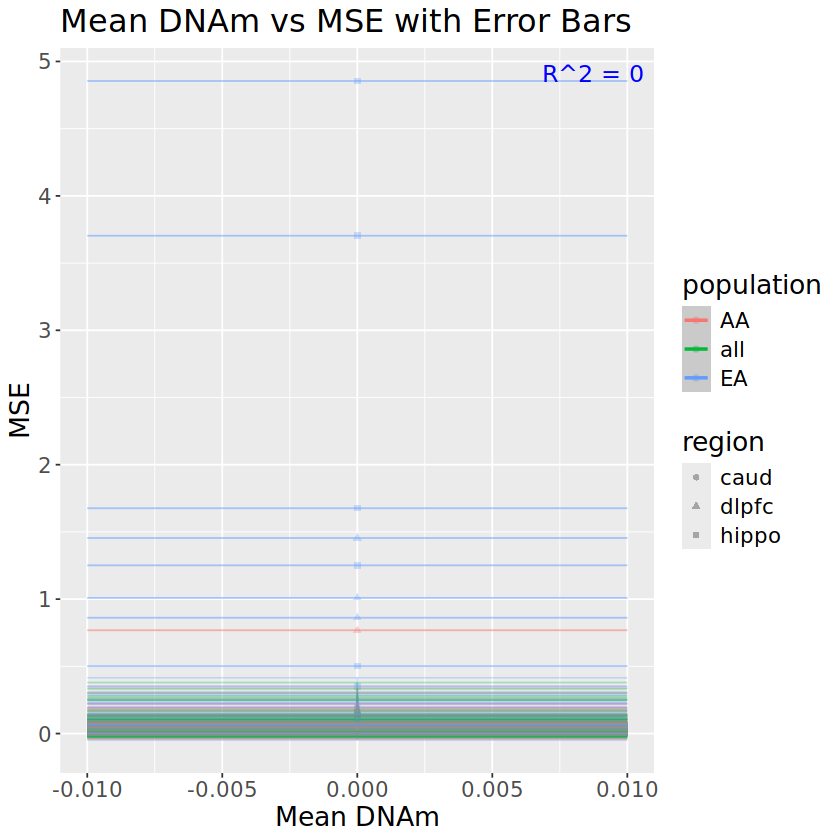

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3502 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 3502 rows containing missing values or values outside the scale range
(`geom_point()`).”


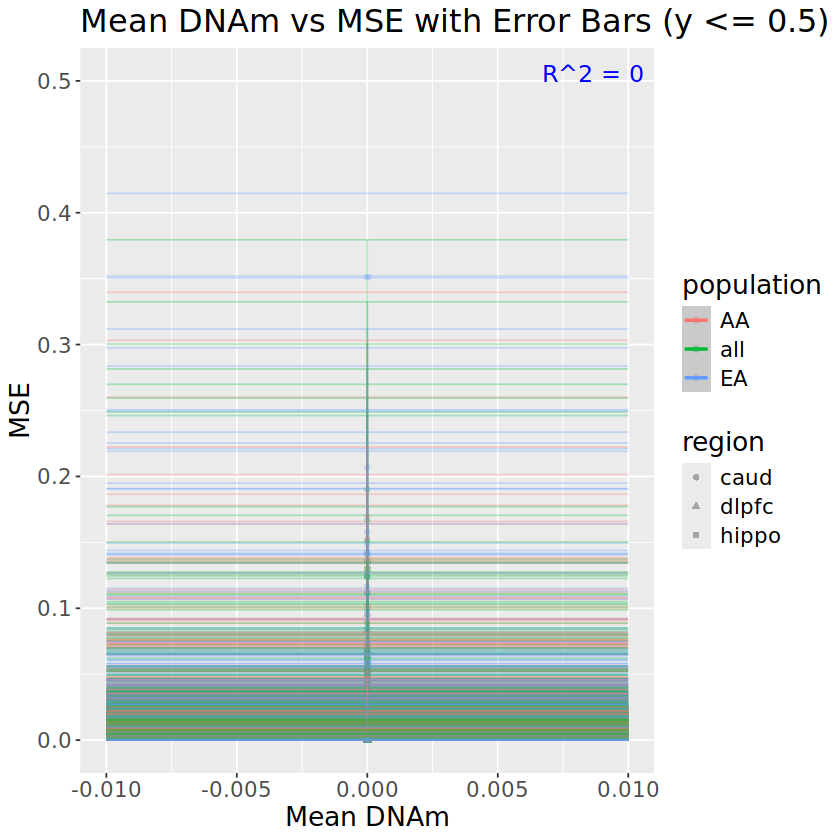

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3502 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 3502 rows containing missing values or values outside the scale range
(`geom_point()`).”


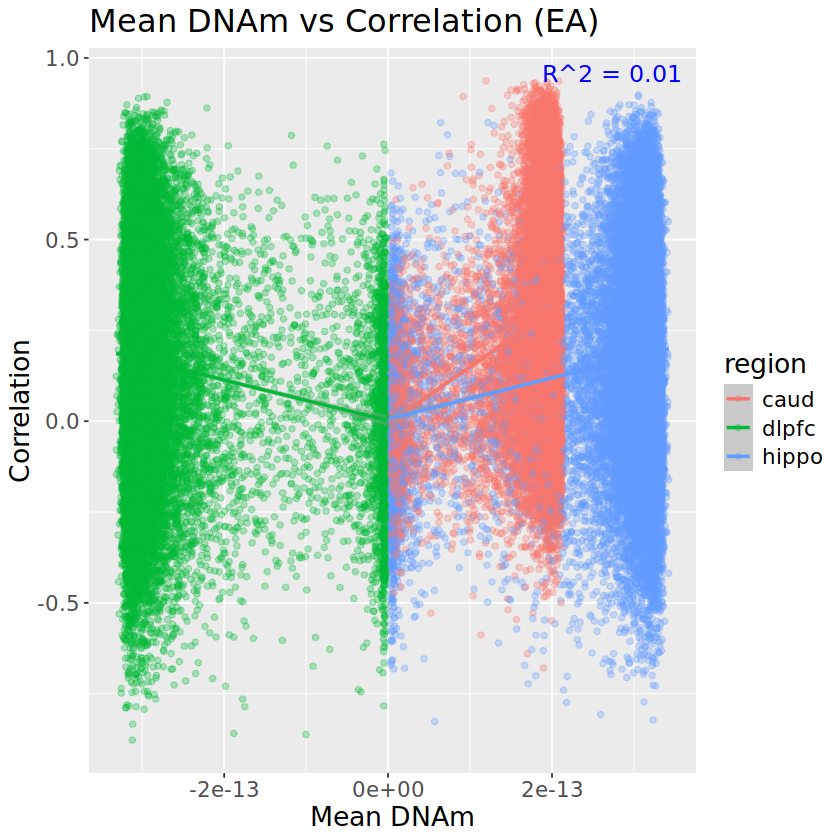

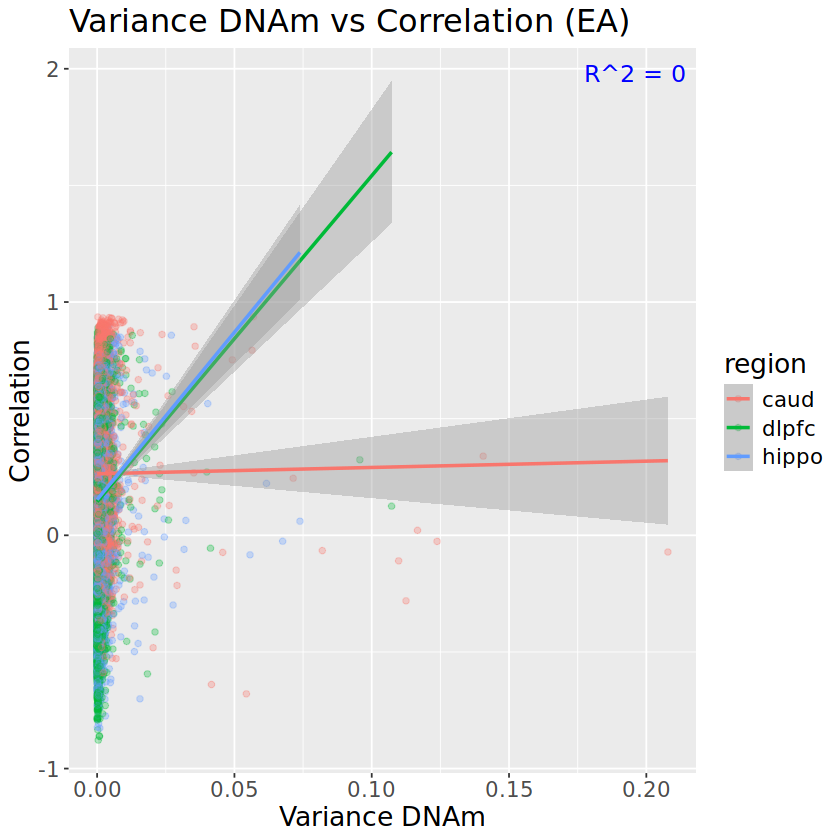

In [23]:
# Plot mean_DNAm vs cor
p1 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = cor, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs Correlation", x = "Mean DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p1 <- add_r_squared(p1, data_in_subset, "mean_DNAm", "cor")
print(p1)

# Plot mean_DNAm vs mse
p2 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs MSE", x = "Mean DNAm", y = "MSE") +
  theme(text = element_text(size = 16))

p2 <- add_r_squared(p2, data_in_subset, "mean_DNAm", "mse")
print(p2)

# Plot var_DNAm vs cor
p3 <- ggplot(data_in_subset, aes(x = var_DNAm, y = cor, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Variance DNAm vs Correlation", x = "Variance DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p3 <- add_r_squared(p3, data_in_subset, "var_DNAm", "cor")
print(p3)

# Plot var_DNAm vs mse
p4 <- ggplot(data_in_subset, aes(x = var_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Variance DNAm vs MSE", x = "Variance DNAm", y = "MSE") +
  theme(text = element_text(size = 16))

p4 <- add_r_squared(p4, data_in_subset, "var_DNAm", "mse")
print(p4)

# Plot mean_DNAm vs cor with error bars based on var_DNAm
p5 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = cor, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_errorbar(aes(ymin = cor - var_DNAm, ymax = cor + var_DNAm), width = 0.02, alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs Correlation with Error Bars", x = "Mean DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p5 <- add_r_squared(p5, data_in_subset, "mean_DNAm", "cor")
print(p5)

# Plot mean_DNAm vs mse with error bars based on var_DNAm
p6 <- ggplot(data_in_subset, aes(x = mean_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_errorbar(aes(ymin = mse - var_DNAm, ymax = mse + var_DNAm), width = 0.02, alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs MSE with Error Bars", x = "Mean DNAm", y = "MSE") +
  theme(text = element_text(size = 16))

p6 <- add_r_squared(p6, data_in_subset, "mean_DNAm", "mse")
print(p6)

# Plot mean_DNAm vs mse with error bars based on var_DNAm and y-axis truncated at 0.5
p6_trunc <- ggplot(data_in_subset, aes(x = mean_DNAm, y = mse, color = population, shape = region)) +
  geom_point(alpha = 0.3) +
  geom_errorbar(aes(ymin = mse - var_DNAm, ymax = mse + var_DNAm), width = 0.02, alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs MSE with Error Bars (y <= 0.5)", x = "Mean DNAm", y = "MSE") +
  theme(text = element_text(size = 16)) +
  ylim(0, 0.5)

p6_trunc <- add_r_squared(p6_trunc, data_in_subset[data_in_subset$mse <= 0.5, ], "mean_DNAm", "mse")
print(p6_trunc)

# Plot mean_DNAm vs cor for population == EA and colored by region
ea_data <- data_in_subset[population == "EA"]

p1_ea <- ggplot(ea_data, aes(x = mean_DNAm, y = cor, color = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Mean DNAm vs Correlation (EA)", x = "Mean DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p1_ea <- add_r_squared(p1_ea, ea_data, "mean_DNAm", "cor")
print(p1_ea)

# Plot var_DNAm vs cor for population == EA and colored by region
p3_ea <- ggplot(ea_data, aes(x = var_DNAm, y = cor, color = region)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "Variance DNAm vs Correlation (EA)", x = "Variance DNAm", y = "Correlation") +
  theme(text = element_text(size = 16))

p3_ea <- add_r_squared(p3_ea, ea_data, "var_DNAm", "cor")
print(p3_ea)


Warning message:
“Removed 5709 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”


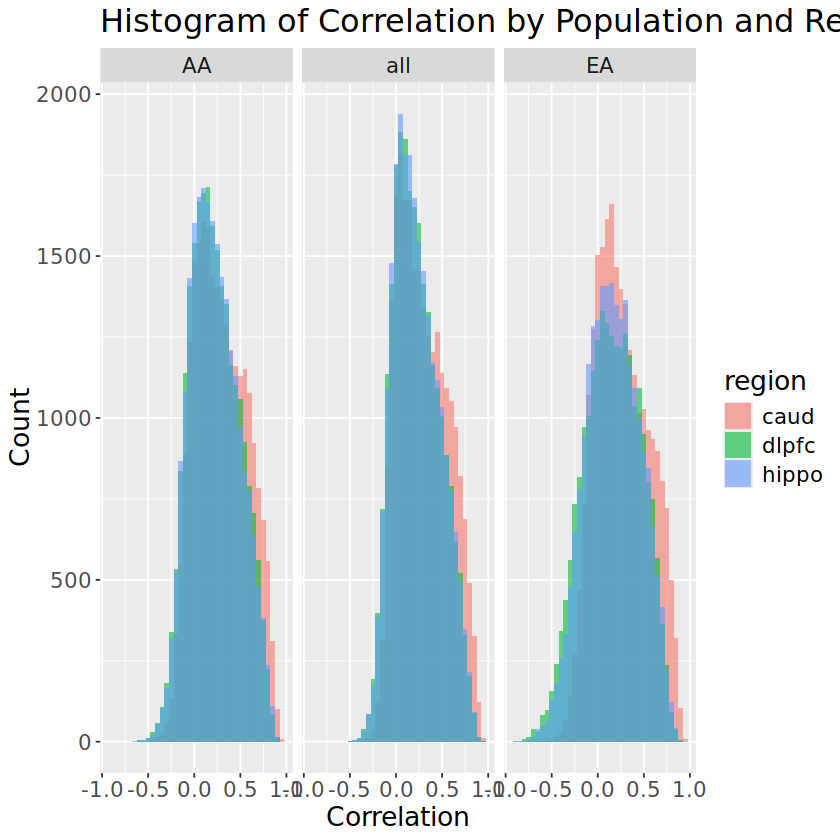

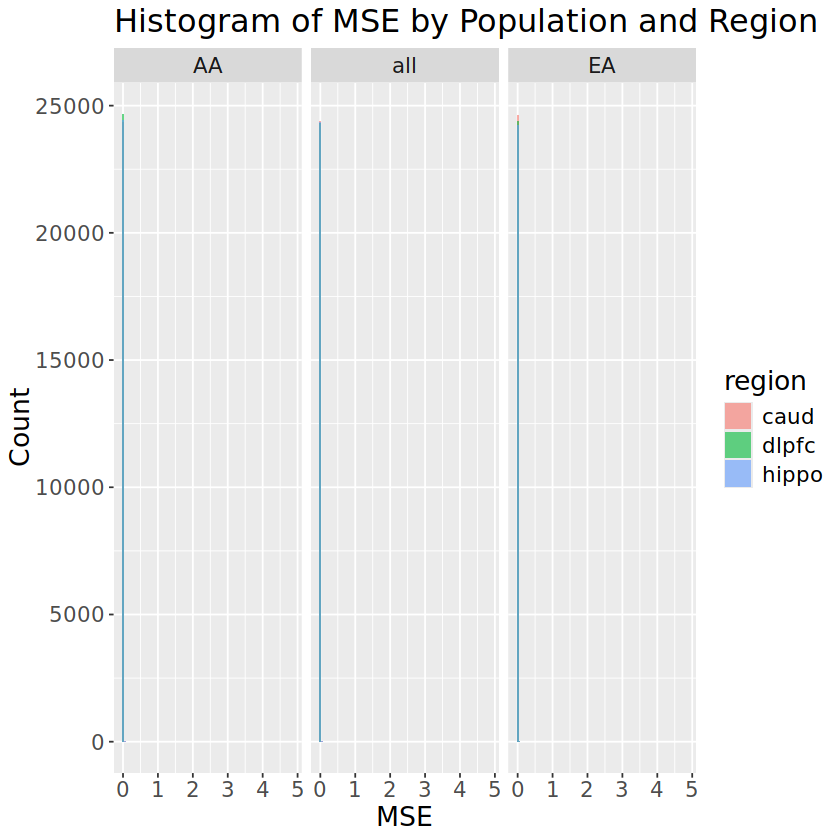

In [24]:
# Histograms of mean cor for all 3 populations separately, colored by region
hist_cor <- ggplot(data_in_subset, aes(x = cor, fill = region)) +
  geom_histogram(binwidth = 0.05, alpha = 0.6, position = "identity") +
  facet_wrap(~ population) +
  labs(title = "Histogram of Correlation by Population and Region", x = "Correlation", y = "Count") +
  theme(text = element_text(size = 16))

print(hist_cor)

# Histograms of mean mse for all 3 populations separately, colored by region
hist_mse <- ggplot(data_in_subset, aes(x = mse, fill = region)) +
  geom_histogram(binwidth = 0.05, alpha = 0.6, position = "identity") +
  facet_wrap(~ population) +
  labs(title = "Histogram of MSE by Population and Region", x = "MSE", y = "Count") +
  theme(text = element_text(size = 16))

print(hist_mse)

In [9]:
dim(data_in)

[1] 4 8

In [8]:
head(data_in)

Chr,pos,population,region,mean_DNAm,var_DNAm,cor,mse
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
19,53819063,EA,dlpfc,-2.442661e-13,0.001665486,-0.27114328,0.001814755
19,53819067,EA,dlpfc,-2.436384e-13,0.001676575,-0.21985437,0.001697885
19,53819109,EA,dlpfc,-2.409120e-13,0.001786713,0.19607838,0.001779831
19,53819274,EA,dlpfc,-2.332771e-13,0.002078951,-0.09710479,0.002127343


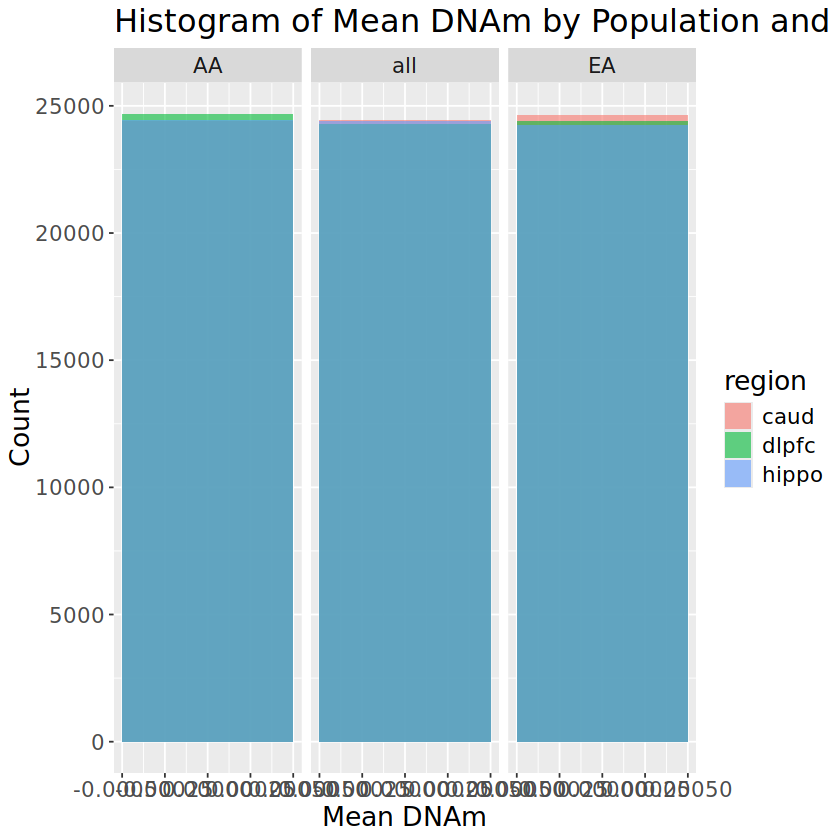

In [27]:
binwidth_value <- 0.001
hist_mean_DNAm <- ggplot(data_in_subset, aes(x = mean_DNAm, fill = region)) +
  geom_histogram(binwidth = binwidth_value, alpha = 0.6, position = "identity") +
  facet_wrap(~ population) +
  labs(title = "Histogram of Mean DNAm by Population and Region", x = "Mean DNAm", y = "Count") +
  theme(text = element_text(size = 16))

print(hist_mean_DNAm)